In [1]:
!pip install fastai --q
from fastai.vision.all import * 

!pip install opendatasets --q

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ibombonato/xray-body-images-in-png-unifesp-competion")

100%|██████████| 200M/200M [00:02<00:00, 74.5MB/s]


In [3]:
path=Path('/content/xray-body-images-in-png-unifesp-competion')

In [4]:
path

Path('/content/xray-body-images-in-png-unifesp-competion')

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#5) [Path('sample_submission.csv'),Path('image_png.png'),Path('train_df.csv'),Path('test_df.csv'),Path('images')]

In [7]:
fns=get_image_files(path)
fns

(#2482) [Path('image_png.png'),Path('images/test/1.2.826.0.1.3680043.8.498.13182731650802699859584669799876138410-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.31075876865118440395243768389177865376-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.82965760659078966479882375077956907981-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.61423578824415674489149933409438220887-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.72746626832123252484222818645606060948-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.81832567979609033681062930077023539521-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.54337517510061543598729326650570329612-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.51099316646081289110768364145915459866-c.png'),Path('images/test/1.2.826.0.1.3680043.8.498.33415543838314631297612168353967779986-c.png')...]

In [8]:
failed=verify_images(fns)
failed

(#0) []

In [9]:
import pandas as pd

In [10]:
train_df=pd.read_csv('/content/xray-body-images-in-png-unifesp-competion/train_df.csv')
train_df.head()

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258-c.png
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125-c.png
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162-c.png
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,NaN,NaN,NaN,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257-c.png
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016-c.png


In [11]:
train_df.columns

Index(['SOPInstanceUID', 'Target', 'MultiImageType', 'ImageType', 'ImageType1',
       'InstanceCreationDate', 'InstanceCreationTime', 'SOPClassUID',
       'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'ContentTime',
       'AccessionNumber', 'Modality', 'Manufacturer', 'ReferringPhysicianName',
       'CodeValue', 'StudyDescription', 'SeriesDescription', 'PatientName',
       'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge',
       'PatientIdentityRemoved', 'BodyPartExamined', 'StudyInstanceUID',
       'SeriesInstanceUID', 'StudyID', 'SeriesNumber', 'InstanceNumber',
       'SamplesPerPixel', 'PhotometricInterpretation', 'Rows', 'Columns',
       'MultiPixelSpacing', 'PixelSpacing', 'PixelSpacing1', 'BitsAllocated',
       'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept',
       'RescaleSlope', 'RescaleType', 'PerformedProcedureStepStartTime',
       'fname', 'img_min', 'img_max', 'img_mean', 'img_std', 'img_pct_window',
       'SpecificCharacte

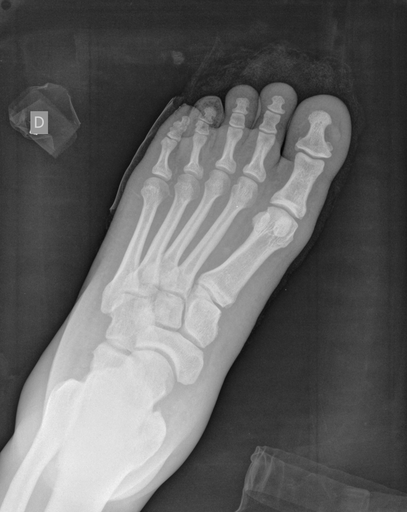

In [12]:
from PIL import Image
im = Image.open(r'/content/xray-body-images-in-png-unifesp-competion/images/train/1.2.826.0.1.3680043.8.498.11609569886309883029089958702332731827-c.png') 
im

In [13]:
path

Path('.')

In [14]:
train_df['image_path']='/content/xray-body-images-in-png-unifesp-competion'+train_df['image_path'].str[1:]
train_df['image_path'].head(1)

0    /content/xray-body-images-in-png-unifesp-competion/images/train/1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258-c.png
Name: image_path, dtype: object

In [15]:
fname = (path/'images/train').ls()[0]
fname

Path('images/train/1.2.826.0.1.3680043.8.498.20846732091687344029990992762580182013-c.png')

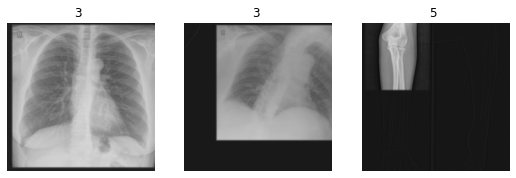

In [16]:
def get_x(r):return r['image_path']
def get_y(r): return r['Target']
xray = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_x = get_x, get_y = get_y,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 item_tfms=Resize(224),
                 

                 )
dls = xray.dataloaders(train_df,bs=32)

dls = xray.dataloaders(train_df,bs=32)
dls.show_batch(nrows=1, ncols=3)

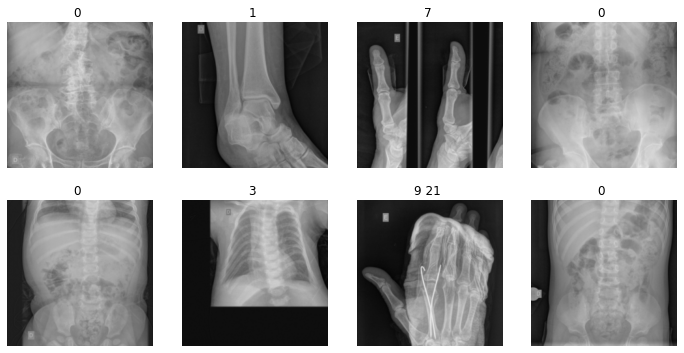

In [17]:
dls.train.show_batch(max_n=8, nrows=2)

In [18]:
learn = vision_learner(dls, resnet50, metrics=F1Score(average='micro'))
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,f1_score,time
0,2.134740,0.937994,0.783862,00:17


epoch,train_loss,valid_loss,f1_score,time
0,0.676195,0.628896,0.844380,00:20
1,0.495620,0.755358,0.827089,00:20
2,0.423662,0.667395,0.870317,00:20
3,0.350719,0.754994,0.847262,00:21
4,0.259695,0.729915,0.855908,00:21
5,0.181241,0.635158,0.870317,00:21
6,0.122481,0.603734,0.864553,00:20
7,0.082045,0.635593,0.870317,00:20
8,0.049004,0.657670,0.867435,00:20
9,0.028868,0.636731,0.876081,00:20


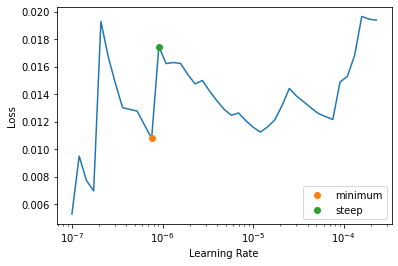

In [20]:

lr=learn.lr_find(suggest_funcs=(minimum, steep))

In [21]:
lr.steep

9.12010818865383e-07

In [22]:

learn.fine_tune(10,lr.steep)

epoch,train_loss,valid_loss,f1_score,time
0,0.018078,0.634674,0.873199,00:16


epoch,train_loss,valid_loss,f1_score,time
0,0.014067,0.638157,0.873199,00:20


KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,f1_score,time
0,0.014067,0.638157,0.873199,00:20


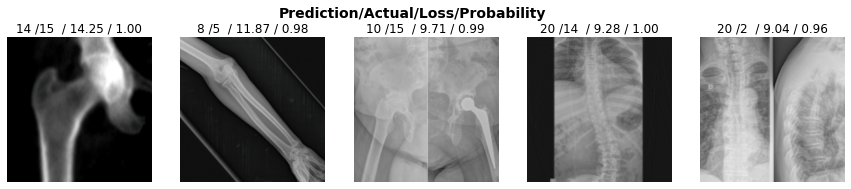

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)

In [24]:
test_df = pd.read_csv('/content/xray-body-images-in-png-unifesp-competion/test_df.csv')


In [25]:
test_df['image_path']='/content/xray-body-images-in-png-unifesp-competion'+test_df['image_path'].str[1:]
test_df['image_path'].head(1)

0    /content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106-c.png
Name: image_path, dtype: object

In [26]:
test_dl_df = dls.test_dl(test_df)

In [27]:
preds_test_df = learn.get_preds(dl=test_dl_df)

In [28]:
preds_test_df=preds_test_df[0].numpy()

In [30]:
labels=learn.dls.vocab

In [31]:
preds=[]
for i in range(len(preds_test_df.tolist())):
  result = np.where(preds_test_df[i] ==np.amax(preds_test_df[i]))
  preds.append(labels[result[0][0]])
print(preds)

['9 21 ', '3 ', '9 ', '3 ', '3 ', '14 ', '3 ', '11 ', '3 ', '5 ', '0 ', '3 ', '3 ', '3 ', '11 ', '21 ', '2 ', '3 ', '21 ', '14 ', '20 ', '3 ', '3 ', '3 ', '3 ', '21 ', '11 ', '3 ', '5 ', '0 ', '3 ', '1 ', '3 ', '3 ', '3 ', '19 ', '20 ', '11 ', '3 ', '3 ', '9 21 ', '5 ', '2 ', '0 ', '3 ', '17 ', '13 20 ', '21 ', '21 ', '9 ', '3 ', '3 ', '3 ', '6 ', '3 ', '3 ', '12 ', '0 ', '15 ', '3 ', '3 ', '16 ', '1 ', '15 ', '3 ', '3 ', '3 ', '3 ', '3 ', '3 ', '1 ', '3 ', '3 ', '3 ', '0 ', '3 ', '1 ', '3 ', '0 3 ', '0 ', '2 ', '21 ', '6 ', '2 ', '3 ', '3 ', '3 ', '16 ', '3 ', '3 ', '3 ', '3 ', '3 ', '15 ', '3 ', '0 ', '3 ', '3 ', '11 ', '5 ', '3 ', '3 ', '3 ', '14 ', '15 ', '0 ', '6 ', '9 ', '14 ', '3 ', '0 ', '3 ', '3 ', '14 ', '11 ', '21 ', '3 ', '3 ', '3 ', '11 ', '1 ', '9 21 ', '11 ', '3 ', '0 ', '1 ', '14 ', '3 ', '3 ', '16 ', '11 ', '14 ', '3 ', '15 ', '21 ', '6 ', '3 ', '3 ', '15 ', '9 ', '11 ', '5 ', '6 ', '1 ', '15 ', '9 21 ', '17 ', '3 ', '3 ', '3 ', '13 ', '3 ', '14 ', '3 ', '13 20 ', '7 '

In [32]:
test_df['Target'] = preds

In [33]:
test_df

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,SpecificCharacterSet,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,image_path
0,1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106,9 21,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106-c.png
1,1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590-c.png
2,1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225,9,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225-c.png
3,1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805-c.png
4,1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414-c.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,1.2.826.0.1.3680043.8.498.98950979295424909746555980174715994054,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.98950979295424909746555980174715994054-c.png
739,1.2.826.0.1.3680043.8.498.99120415799121180043999929775380253296,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.99120415799121180043999929775380253296-c.png
740,1.2.826.0.1.3680043.8.498.99132008951330408682785705454375383148,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.99132008951330408682785705454375383148-c.png
741,1.2.826.0.1.3680043.8.498.99611256581875030709909119881605604054,21,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/xray-body-images-in-png-unifesp-competion/images/test/1.2.826.0.1.3680043.8.498.99611256581875030709909119881605604054-c.png


In [34]:
df_submission = test_df[['SOPInstanceUID', 'Target']]


In [35]:
df_submission.head()

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106,9 21
1,1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590,3
2,1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225,9
3,1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805,3
4,1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414,3


In [36]:
df_submission.to_csv('submission.csv', index=False)

In [37]:
!pip install kaggle
import kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!kaggle competitions submit -c unifesp-x-ray-body-part-classifier -f submission.csv -m "Message"

100% 49.7k/49.7k [00:00<00:00, 270kB/s]
Successfully submitted to UNIFESP X-ray Body Part Classifier Competition